# OpenCV

## OpenCV là gì?

OpenCV (thư viện mã ngồn mở) được viết tắt là Open Computer Vision (thị giác máy tính)

cho phép máy tính có thể nhìn được giống như con người

## Cài đặt

### Sử dụng anaconda
conda install -c conda-forge opencv

### Sử dụng cmd

pip install opencv-python

### Sử dụng Jupyter notebook

!pip install opencv-python

## Thư viện

-- Các thư viện để sử dụng cho bài

In [1]:
# thư viện sử lý ảnh
import cv2

# thư viện vẽ biểu đồ , để hiển thị ảnh
import matplotlib.pyplot as plt

#
import numpy as np

# thư viện sử lý ảnh
from PIL import Image,ImageColor

# thư viện dùng để xoay ảnh trong bài
import imutils

## Đọc /  Ghi / Hiển thị file ảnh

### Đọc và hiển thị ảnh

In [2]:
# đọc file bằng imread('') truyền vào đường link dẫn đến file 
snake = cv2.imread('snake.jpg')


cv2.imshow("Con Rắn",snake)

# thời gian hiện thị ảnh (ms), nếu không truyền vào tham số thì ảnh sẽ ko bị mất
cv2.waitKey(1000)

# đóng hết các cửa sổ ảnh
cv2.destroyAllWindows()

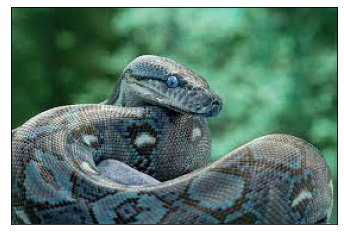

In [3]:
# sử dụng plt để hiển thị ảnh
plt.imshow(snake)

# loại bỏ toạ độ
plt.xticks([])

plt.yticks([]);

Có rất nhiều chế độc đọc trong OpenCV

    1. IMREAD_COLOR : màu sắc thật của hình ảnh
    2. IMREAD_GRAYSCALE : màu xám 
    3. IMREAD_IGNORE_ORIENTATION
    4. IMREAD_ANYDEPTH
    v.v

In [4]:
# ví dụ 
img1 = cv2.imread('snake.jpg',cv2.IMREAD_COLOR)
img2 = cv2.imread('snake.jpg',cv2.IMREAD_GRAYSCALE)
img3 = cv2.imread('snake.jpg',cv2.IMREAD_IGNORE_ORIENTATION)

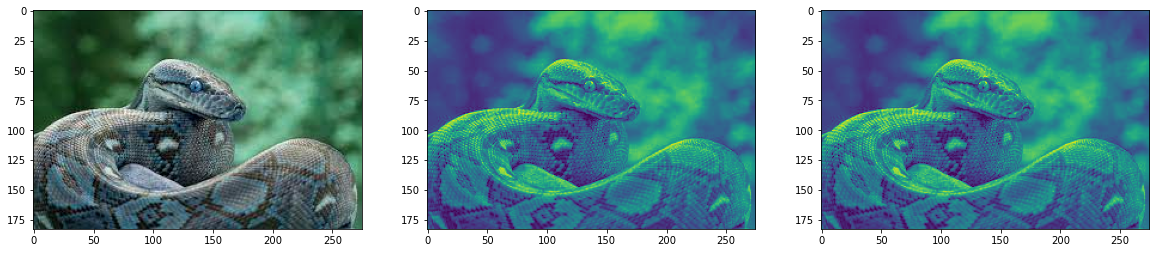

In [5]:
fig ,ax = plt.subplots(nrows = 1,ncols = 3,figsize=(20,20))

ax[0].imshow(img1)

ax[1].imshow(img2)

ax[2].imshow(img3);

### Ghi file

In [6]:
# hàm ghi file truyền vào tên file và file muốn ghi, trả về trạng trái true hoặc false
answer = cv2.imwrite('snake_tmp.png',snake)

answer

True

## Thuộc tính của hình ảnh

In [7]:
snake.shape

(183, 275, 3)

In [8]:
snake.size

150975

In [9]:
snake.dtype

dtype('uint8')

## Hệ màu trong OpenCV

Mặc định OpenCV sử dụng màu BGR (blue-green-red)

Trong một số trường hợp cần convert sang các loại màu khác để sử dụng

### Hàm convert color

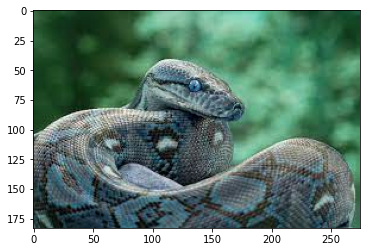

In [10]:
plt.imshow(snake); 

In [11]:
# xem mode của ảnh 
mode_snake =Image.open('snake.jpg')
mode_snake.mode

'RGB'

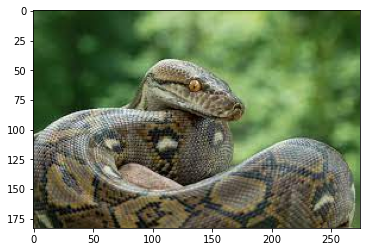

In [12]:
# chuyển từ chế độ RGB sang BGR 

new_snake_BGR = cv2.cvtColor(snake,cv2.COLOR_RGB2BGR)

plt.imshow(new_snake_BGR);

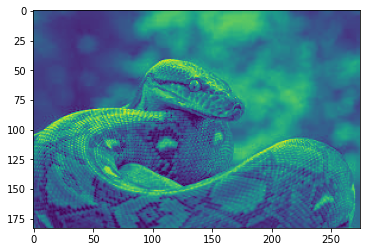

In [13]:
# chuyển từ RGB sang GRAY

new_snake_gray = cv2.cvtColor(snake,cv2.COLOR_RGB2GRAY)

plt.imshow(new_snake_gray);

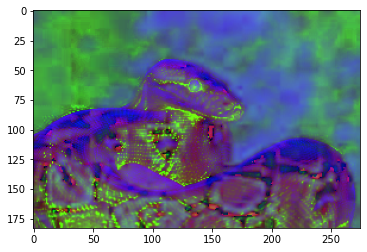

In [14]:
# chuyển từ RGB sang HSV
# chế độ HSV (Hue/Set/Value) giảm tối thiểu ánh sáng môi trường

new_snake_HSV = cv2.cvtColor(snake,cv2.COLOR_RGB2HSV)
plt.imshow(new_snake_HSV);

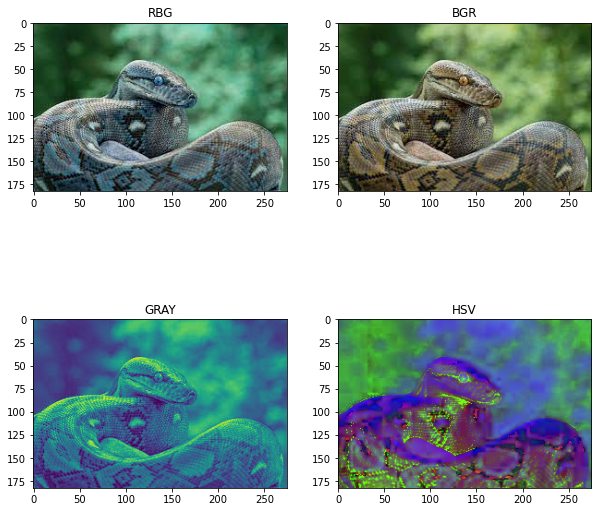

In [15]:
# Tổng kết lại bằng subplots
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(10,10))

ax[0,0].imshow(snake)
ax[0,0].set(title="RBG")

ax[0,1].imshow(new_snake_BGR)
ax[0,1].set(title="BGR")

ax[1,0].imshow(new_snake_gray)
ax[1,0].set(title="GRAY")

ax[1,1].imshow(new_snake_HSV)
ax[1,1].set(title="HSV");

## Hàm resize

### Tuyệt đối

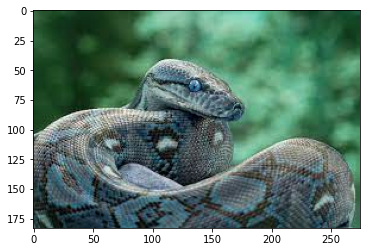

In [16]:
plt.imshow(snake);

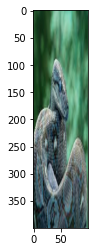

In [17]:
new_resize_snake = cv2.resize(snake,dsize=(100,400))
plt.imshow(new_resize_snake);

In [18]:
### Tương đối ( tăng kích thước lên x lần hoặc giảm x lần)

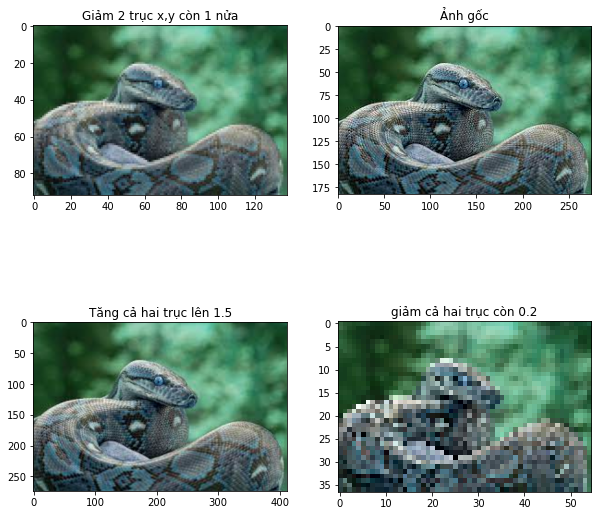

In [19]:
fig , ax = plt.subplots(nrows=2,ncols=2,figsize=(10,10))

ax[0,0].imshow(cv2.resize(snake,dsize=None,fx=0.5,fy=0.5))
ax[0,0].set(title="Giảm 2 trục x,y còn 1 nửa")

ax[0,1].imshow(cv2.resize(snake,dsize=None,fx=1,fy=1))
ax[0,1].set(title="Ảnh gốc")

ax[1,0].imshow(cv2.resize(snake,dsize=None,fx=1.5,fy=1.5))
ax[1,0].set(title="Tăng cả hai trục lên 1.5")

ax[1,1].imshow(cv2.resize(snake,dsize=None,fx=0.2,fy=0.2))
ax[1,1].set(title="giảm cả hai trục còn 0.2");

## Hàm rotate ảnh 

### Cách 1

In [20]:
new_rotate_snake = snake

# lấy chiều cao và chiều rộng của ảnh
(h,w) = new_rotate_snake.shape[:2] 

In [21]:
# lấy tâm bức ảnh
center = (h/2,w/2)
# góc quay
angle = 45
scale  = 1.0

In [22]:
New_rotate = cv2.getRotationMatrix2D(center,angle,scale)
snake45 = cv2.warpAffine(new_rotate_snake,New_rotate,(h,w))

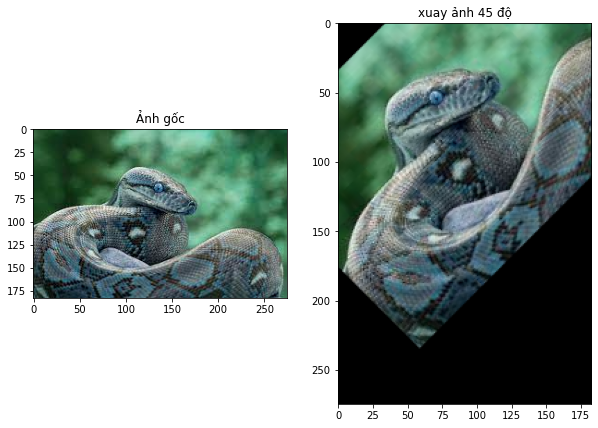

In [23]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(10,10))

ax[0].imshow(new_rotate_snake)

ax[0].set(title="Ảnh gốc")

ax[1].imshow(snake45)

ax[1].set(title="xuay ảnh 45 độ");

### Cách 2

In [24]:
# truyền vào đối tượng ảnh và góc xoay (ngược kim đồng hồ)
imutils_snake = imutils.rotate(snake,90)

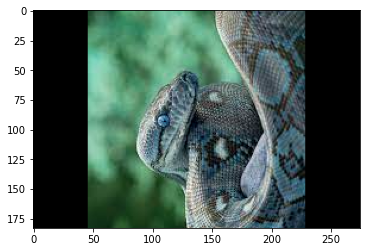

In [25]:
plt.imshow(imutils_snake);

## Draw , vẽ trong OpenCV

có thể vẽ hình tròn, hình chữ nhật, hình elip, đa đường, lồi, v.v. dễ dàng trong OpenCV ,mục đích có thể là

đánh dấu một đối tượng nào đó trong ảnh

### Hình tròn cv2.circle(hình ảnh, toạ độ tâm(tuple), bán kính , màu sắc (RGB,..) , độ dày)

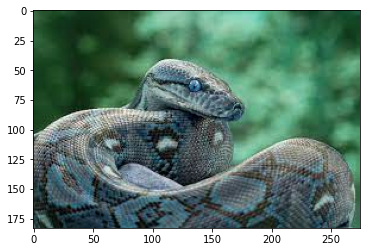

In [35]:
Circle = cv2.imread('snake.jpg')
plt.imshow(Circle);

In [36]:
# đôi tên màu thành bộ màu RBG
ImageColor.getrgb('blue')

(0, 0, 255)

In [37]:
B = cv2.circle(Circle,(134,62),10,(0,0,255),10)

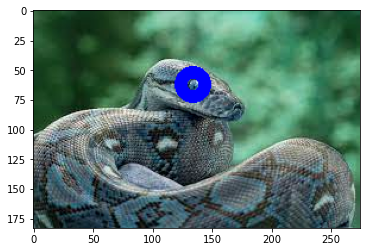

In [38]:
plt.imshow(B);

### Hình chữ nhật rectangle

cv2.rectangle(hình ảnh, (trên,trái), (dưới,phải), màu, độ dày)

In [39]:
rectangle_snake = cv2.imread('snake.jpg')

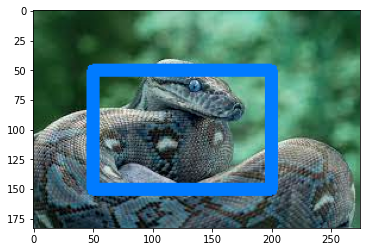

In [40]:
plt.imshow(cv2.rectangle(rectangle_snake,(50,50),(200,150),(0,123,321),10));

## Canny Detection (xác định ranh giới các đối tượng trong ảnh)

Canny(đối tượng ảnh, cường độ tối thiểu, cường độ tối da,độ lớn gradient)

In [41]:
edge = cv2.imread('snake.jpg')

In [46]:
edges = cv2.Canny(edge,100,300,True)

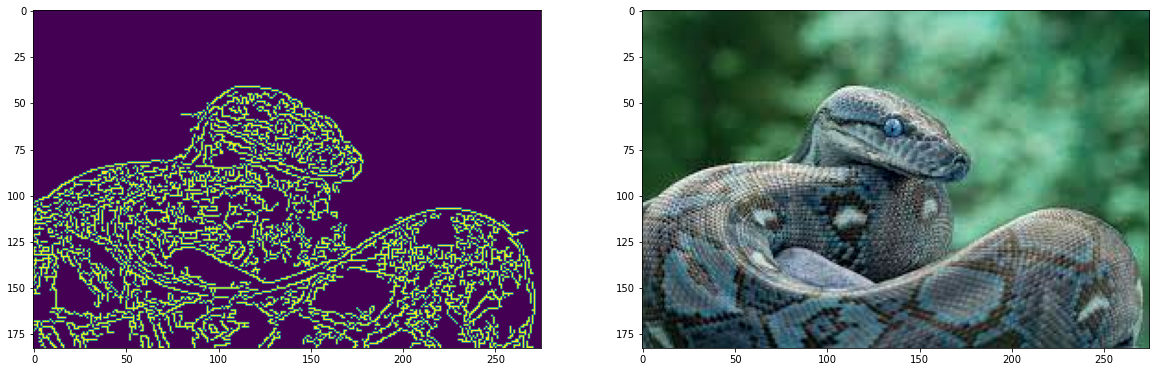

In [47]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(20,10))

ax[0].imshow(edges)

ax[1].imshow(snake);

## Hàm Threshold 

Được sử dụng để tách một đối tượng ra khỏi một vùng nào đó


Đưa một ảnh về dạng nhị phân (đen và trắng) (0,255)

bước tiền xử lý cho các giải thuật nhận dạng chữ viết/ ký tự (OCR)

phân vùng ảnh, tìm kiếm các đối tượng trong ảnh

Nếu pixel có giá trị lớn hơn giá trị ngưỡng thì nó được gán giá trị 1

ngược lại nhỏ hơn giá trị ngưỡng thì gán giá trị 0

**Các bước nhị phân hoá ảnh**

    1. Biến đổi ảnh màu(color)BGR sang ảnh xám (gray)
    2. Thiết lập ngưỡng để nhị phân hoá ảnh
    3.Áp dụng ngưỡng vào ảnh xám để tạo ảnh nhị phân

### Ngưỡng đơn giản

cv2.threshold(đối tượng ảnh,ngưỡng ảnh,255,chế độ(cv2.THRESH_BINARY)))

In [48]:
spider = cv2.imread('spiderman.jpg')

# convert ảnh sang chế mộ màu
spider = cv2.cvtColor(spider,cv2.COLOR_BGR2RGB)

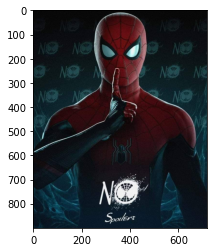

In [49]:
plt.imshow(spider);

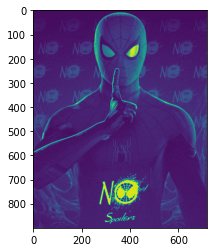

In [50]:
# chuyển hình ảnh sang màu xám
spider_gray = cv2.cvtColor(spider,cv2.COLOR_RGB2GRAY)
plt.imshow(spider_gray);

In [51]:
print(cv2.threshold(spider_gray,127,255,cv2.THRESH_BINARY))
# trả về 1 tuple - giá trị ngưỡng và mảng numpy array gồm chỉ có các giá trị 0 và 1

(127.0, array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8))


In [52]:
tmp , new_thresh_spider = cv2.threshold(spider_gray,50,255,cv2.THRESH_BINARY)

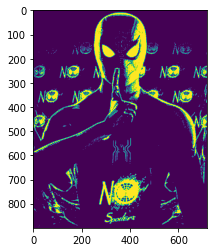

In [53]:
plt.imshow(new_thresh_spider);

In [54]:
tmp , new_thresh_spider2 = cv2.threshold(spider_gray,100,255,cv2.THRESH_BINARY)

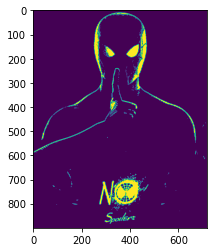

In [55]:
plt.imshow(new_thresh_spider2);

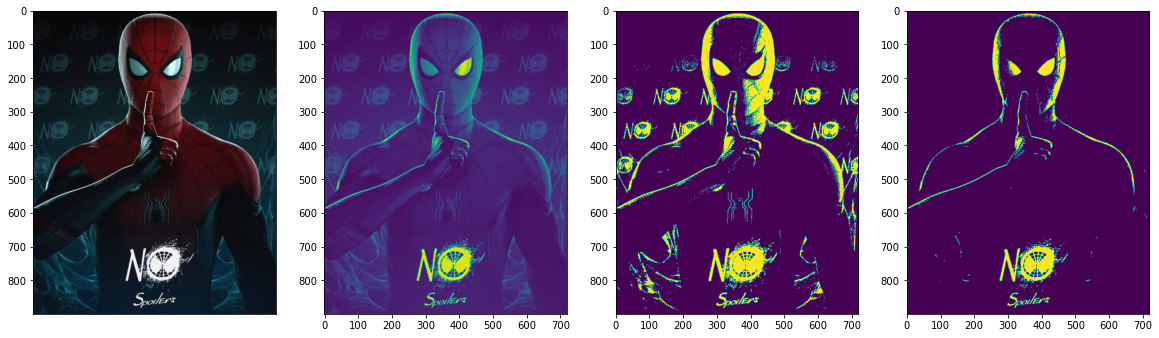

In [56]:
# Tổng kết bằng Biểu đồ 

fig, ax = plt.subplots(nrows=1,ncols=4,figsize=(20,10))


ax[0].imshow(spider)
ax[0].set_xticks([])
ax[0].set_xticks([])

ax[1].imshow(spider_gray)

ax[2].imshow(new_thresh_spider)

ax[3].imshow(new_thresh_spider2);

### Ngưỡng thích ứng

Adaptive Threshold

lựa chọn ngưỡng tự động cho vùng lân cận

In [302]:
tmp,thre_spider = cv2.threshold(spider_gray,50, 255, cv2.THRESH_BINARY) 

In [303]:
adap_spider = cv2.adaptiveThreshold(spider_gray,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)

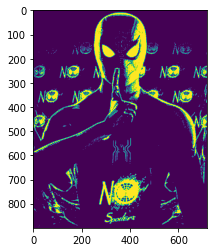

In [305]:
plt.imshow(thre_spider);

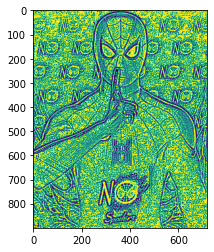

In [307]:
plt.imshow(adap_spider);

## Contours

Đường bao là một đường cong nối tất cả các điểm liên tục có cùng màu sắc hoặc cường độ (dọc theo đường biên).

Như tìm đối tượng màu trắng từ nền đen.sử dụng ảnh nhị phân và trước khi tìm đường viền

Trong OpenCV, có hai hàm, một để tìm đường viền và hàm khác để vẽ đường viền, hàm findContours() để tìm đường viền và drawCounter() để vẽ một đường viền.

**image**, **contours**, **hierarchy** = cv2.findContours (img, mode, method, contours, hierarchy, offset)

Hàm này trả về ba đối tượng: Img : Hình ảnh đầu vào phải tìm đường viền.

In [309]:
contours_spider = cv2.imread('spiderman.jpg')

In [310]:
canny_spider = cv2.Canny(contours_spider,100,200,False)

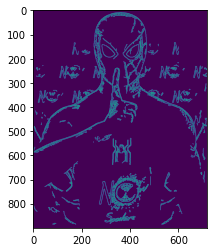

In [312]:
plt.imshow(canny_spider);

In [314]:
contours, hierarchy = cv2.findContours(canny_spider,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 
A = cv2.drawContours(contours_spider, contours, -1, (0, 255, 0), 3) 

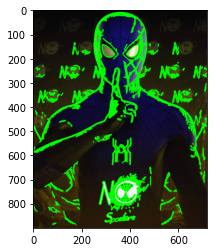

In [316]:
plt.imshow(A);